# Предсказание уровня заработной платы  

https://archive.ics.uci.edu/ml/datasets/adult

В данном экзамене вам нужно будет предсказывать уровень заработной платы респондента: больше 50к долларов в год или меньше.

**Описание признаков**:

1. Категорийные признаки

`workclass`: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. Individual work category

`education`: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. Individual's highest education degree

`marital-status`: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. Individual marital status

`occupation`: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. Individual's occupation

`relationship`: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. Individual's relation in a family

`race`: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. Race of Individual

`sex`: Female, Male.

`native-country`: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands. Individual's native country

2. Количественные признаки

`age`: continuous. Age of an individual

`fnlwgt`: final weight, continuous. The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau.

`capital-gain`: continuous.

`capital-loss`: continuous.

`hours-per-week`: continuous. Individual's working hour per week

In [1]:
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")
os.chdir("C:/Users/Дана/Downloads/Python/Fintech_2020-main_1/Fintech_2020-main/Машинное обучение/Данные/ДЗ1/")
adult = pd.read_csv("adult.csv", dtype = {"fnlwgt": int,
                                             "Education_Num": int,
                                             "Capital_Gain":int,
                                             "Capital_Loss":int,
                                             "Hours_per_week":int,
                                             "Age":int})

In [2]:
# Список категориальных признаков
cat_cols = ['Workclass', 'Education', 'Marital_Status', 'Occupation',
            'Relationship', 'Race', 'Sex', 'Country']

# Список количественных признаков
quant_cols = list(set(adult.columns) - set(cat_cols))
quant_cols.remove("Target")
# Удалим лишние пробелы перед значениями внутри категориальных столбцов
for cat_col in cat_cols:
    adult[cat_col] = adult[cat_col].str.strip(" ")


# Преобразуем категориальные признаки при помощи дамми-кодирования
new_df = pd.concat([adult.drop(cat_cols, axis=1),
                  pd.get_dummies(adult[cat_cols], drop_first=True)],
                 axis=1)
# Удалим строки с пропусками
new_df = new_df.dropna()
# Исправим неточности в целевой переменной
print(new_df['Target'].value_counts())
new_df['Target'] = new_df['Target'].str.strip(" ")
new_df['Target'] = new_df['Target'].map({">50K.":">50K", 
                                       "<=50K.":"<=50K"}).fillna(new_df['Target'])
print(new_df['Target'].value_counts())

 <=50K     22654
 <=50K.    11360
 >50K       7508
 >50K.      3700
Name: Target, dtype: int64
<=50K    34014
>50K     11208
Name: Target, dtype: int64


# Задания

ВНИМАНИЕ!!!
ВЕЗДЕ, где есть параметр **random_state**, устанавливайте его равным **своему номеру**, иначе у нас могут не совпасть результаты и будет плохо (кроме KFold кросс-валидации у нас будет параметр Shufle=False, а значит и random_state не нужен). 

Результаты округляем до 5 знака после запятой. Например, ROC AUC = 0.56156

Задание *найти оптимальный гиперпараметр* (если не оговорено иное) подразумевает 5  фолдовую стратифицированную кросс-валидацию с random_state, равным **вашему номеру**.

По умолчанию мы используем ВСЕ ПРИЗНАКИ из датасетов.

In [3]:
students_random_state = {
 'Базуева Мария Дмитриевна': 9933,
 'Бориско Данила Ильич': 19563,
 'Братков Герман Сергеевич': 2103,
 'Орлан Суван-оол': 2113,
 'Валл Федор Викторович': 1883,
 'Егорова Анна Сергеевна': 253,
 'Едовина Алина Игоревна': 353,
 'Загарнюк Елизавета Максимовна': 9793,
 'Захаров Алексей Сергееивч': 5873,
 'Калёнов Алексей Аркадьевич': 13343,
 'Карасева Алина Александровна': 12653,
 'Каширин Егор Михайлович': 16723,
 'Косинов Андрей Вячеславович': 9403,
 'Красиков Евгений Владимирович': 6013,
 'Кузьмин Никита Кириллович': 4523,
 'Монгуш Тенгиз Анатольевич': 6683,
 'Мурадян Акоп Араратович': 11553,
 'Наумова Анастасия Юрьевна': 10203,
 'Панчук Александр Сергеевич': 11253,
 'Пашинина Татьяна Викторовна': 2683,
 'Пустоваров Артем Андреевич': 1873,
 'Роговая Тамара Олеговна': 14723,
 'Селезнев Дмитрий Владимирович': 7343,
 'Сидорякин Виталий Дмитриевич': 15544,
 'Филиппов Антон Павлович': 1263,
 'Фрольцов Григорий Максимович': 17233,
 'Хамитов Давид Альбертович': 11944,
 'Хомушку Ганна Алексеевна': 1582,
 'Царева Мария Сергеевна': 11336}


In [4]:
# Введите свой номер random state
your_number_random_state = 1582

# Для расчета доли, по которой будем делить датасеты
max_ = max(list(map(lambda x: np.log(x), students_random_state.values())))
frac_student = np.log(your_number_random_state) / max_

# Уникальный датасет для каждого студента
df_model = new_df.sample(frac = frac_student, random_state=your_number_random_state)


# Определим целевую переменную 
X, y = df_model.drop("Target", axis=1), df_model['Target'].map({">50K":1, "<=50K":0})

In [5]:
your_number_random_state

1582

In [6]:
# Разобьем на тренировочную и тестовую (уже уменьшенный датасет для каждого студента)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                   random_state=your_number_random_state)

# Стандартизируем количественные признаки

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[quant_cols] = sc.fit_transform(X_train[quant_cols])
X_test[quant_cols] = sc.transform(X_test[quant_cols])

# fio = 'Хомушку Ганна Алексеевна'
# final_df = pd.DataFrame(index=[fio], columns=np.arange(1, 11))
# from sklearn.model_selection import StratifiedKFold
# kf = StratifiedKFold(n_splits=5)

1) Обучите случайный лес с параметрами по умолчанию и со всеми признаками и
 сделайте прогноз на тестовых данных. Чему равен `ROC AUC` на тестовой выборке?

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
rfc = RandomForestClassifier(random_state=your_number_random_state)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict_proba(X_test)[:, 1]
print('roc_auc_score = ', roc_auc_score(y_test, rfc.predict_proba(X_test)[:, 1]))


roc_auc_score =  0.898284426834951


In [8]:
print('roc_auc_score = ', roc_auc_score(y_test, rfc_pred).round(5))

roc_auc_score =  0.89828


<!-- 2) Среди следующих значений коэффициентов регуляризации альфа выберите тот,
для которого `F1-score` на тестовой выборке для метода LightGBM c числом деревьев =
25 и остальными опциями по умолчанию *со всеми факторами* будет максимальным.
В ответе укажите значение максимального `Recall`.
Используем библиотеку xgboost и метод XGBoostClassifier. -->

2) Среди следующих значений коэффициентов регуляризации альфа выберите тот, для которого Recall на тестовой выборке для градиентного бустинга c числом деревьев = 25 и остальными опциями по умолчанию со всеми факторами будет максимальным. В ответе укажите значение максимального Recall. Используем библиотеку xgboost и метод XGBoostClassifier

$$ regalpha = [0.1, 0.2, 0.5, 0.55, 0.65, 0.7, 0.8, 1] $$

In [9]:
from xgboost import XGBClassifier
from sklearn.metrics import recall_score

recall_list=[]
max_recall = 0
regalpha = [0.1,0.2,0.5,0.55,0.65,0.7,0.8,1]
for i in regalpha:
    xgb = XGBClassifier(n_estimators=25, reg_alpha=i, random_state=your_number_random_state)
    xgb.fit(X_train, y_train)
    y_predict = xgb.predict(X_test)
    recall = np.round(recall_score(y_test, y_predict), 5)
    print('regalpha = ', i, ' recall = ', recall)
    recall_list.append(recall)
    max_recall=max(max_recall, recall)
print('max(recall_list) = ', max(recall_list), 'max_recall = ', max_recall,\
      '\n recall_list', recall_list)

[19:29:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
regalpha =  0.1  recall =  0.63311
[19:29:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
regalpha =  0.2  recall =  0.63351
[19:29:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [10]:
print('max(recall_list) = ', max(recall_list), 'max_recall = ', max_recall,\
      '\n recall_list', recall_list)

max(recall_list) =  0.63828 max_recall =  0.63828 
 recall_list [0.63311, 0.63351, 0.63589, 0.6347, 0.63709, 0.63669, 0.63311, 0.63828]


3) Чему равен `Precision` для дерева решений с параметрами по
умолчанию (реализация sklearn, random_state соответствует вашему номеру)?


In [11]:
from sklearn.metrics import precision_score
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=your_number_random_state)
tree.fit(X_train, y_train)
y_predict = tree.predict(X_test)
print('precision_score = ', precision_score(y_test, tree.predict(X_test)))

precision_score =  0.6065053550178501


In [12]:
print('precision_score = ', np.round(precision_score(y_test, y_predict), 5))

precision_score =  0.60651


<!-- 4) Удалите признаки, для которых коэффициенты в LASSO регрессии равны
нулю (на тренировочной выборке) и сделайте прогноз на тестовой выборке
при помощи логистической регрессии с коэффициентом регуляризации C=0.01.
В ответ запишите полученный `ROC_AUC`. -->

4)Удалите признаки, для которых коэффициенты в LASSO регрессии равны нулю (на тренировочной выборке) и сделайте прогноз на тестовой выборке при помощи логистической регрессии (Ridge) с коэффициентом регуляризации C=0.01. В ответ запишите полученный ROC_AUC.

In [13]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
lasso = LogisticRegression(penalty='l1', solver='liblinear', random_state=your_number_random_state)
lasso.fit(X_train, y_train)
lasso_coefs = lasso.coef_
lasso_coefs_zero = dict(zip(X_train.columns, lasso_coefs.flatten()))
lasso_coefs_zero_dict = {key: value for key, value in lasso_coefs_zero.items() if value == 0}

X_train_postlasso = X_train.drop(lasso_coefs_zero_dict.keys(), axis=1)
X_test_postlasso = X_test.drop(lasso_coefs_zero_dict.keys(), axis=1)

lr = LogisticRegression(C=0.01, random_state=your_number_random_state)
lr.fit(X_train_postlasso, y_train)
y_predict_postlasso = lr.predict_proba(X_test_postlasso)[:, 1]
print('roc_auc_score = ', roc_auc_score(y_test, lr.predict_proba(X_test_postlasso)[:, 1]))

roc_auc_score =  0.8999624528429014


In [14]:
print('roc_auc_score = ', np.round(roc_auc_score(y_test, y_predict_postlasso), 5))

roc_auc_score =  0.89996


5) При помощи кросс-валидации найдите оптимальные параметры
*max_depth* (значения [1, 3, 5, 7]) и *min_samples_leaf* (значения [10, 50, 100])
для случайного леса (остальные параметры по умолчанию).
В ответ запишите значение `ROC AUC` на тестовой выборке при оптимальных параметрах.
Оптимизироваться нужно именно на ROC AUC.

In [15]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)

rfc_params = {'max_depth': [1, 3, 5, 7], 'min_samples_leaf':[10, 50, 100]}
rfc = RandomForestClassifier(random_state=your_number_random_state)
rfc_grid = GridSearchCV(estimator=rfc, param_grid=rfc_params, scoring='roc_auc', n_jobs=-1, cv=skf, verbose=True)
rfc_grid.fit(X_train, y_train)
rfc_grid_pred = rfc_grid.predict_proba(X_test)[:, 1]
rfc_grid.best_params_, rfc_grid.best_score_, roc_auc_score(y_test, rfc_grid.predict_proba(X_test)[:, 1])

Fitting 5 folds for each of 12 candidates, totalling 60 fits


({'max_depth': 7, 'min_samples_leaf': 10},
 0.9049206330619896,
 0.9033262268410553)

In [16]:
print('roc_auc_score = ', roc_auc_score(y_test, rfc_grid_pred).round(5))

roc_auc_score =  0.90333


6) Примените метод главных компонент с десятью компонентами.
В ответ запишите `долю дисперсии, которая была объяснена данными
компонентами`. Здесь тренировочную и тестовую выборку объединяем в одну.

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10, random_state=your_number_random_state)

X_full=pd.concat([X_train, X_test], axis=0)

pca.fit(X_full)
# pca.transform(X_full)
pca.explained_variance_ratio_.sum()

0.7762428498428796

In [18]:
print('pca.explained_variance_ratio_.sum() = ', pca.explained_variance_ratio_.sum().round(5))

pca.explained_variance_ratio_.sum() =  0.77624


7) Обучите модель бэггинга на тренировочном наборе данных для
всех признаков для количества деревьев, равного 50.
Чему равен `OOB score` на тренировочной выборке?

In [19]:
from sklearn.ensemble import BaggingClassifier
bdt = BaggingClassifier(n_estimators=50, random_state=your_number_random_state,
                       oob_score=True)
bdt.fit(X_train, y_train)
print('bdt.oob_score_ = ', bdt.oob_score_)

bdt.oob_score_ =  0.848758369353335


In [20]:
print('bdt.oob_score_ = ', np.round(bdt.oob_score_, 5))

bdt.oob_score_ =  0.84876


8) Подберите оптимальное значение
max_features = [1, 2, 5, 10] для бэггинга,
где в качестве базового алгоритма будет логистическая регрессия с C=0.05.
Параметр n_estimators настройте равным 25.
Оптимизируемся на `Precision`. Чему равен `ROC AUC` на тестовой выборке
с лучшим гиперпараметров из тренировочной выборки?

In [21]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)

parameters = {'max_features':  [1, 2, 5, 10] }
lr = LogisticRegression(C=0.05, random_state=your_number_random_state)
bagdt = BaggingClassifier(base_estimator=lr, n_estimators=25, random_state=your_number_random_state)
gcv_grid = GridSearchCV(estimator=bagdt, param_grid=parameters, scoring='precision', n_jobs=-1, cv=skf, verbose=True)
gcv_grid.fit(X_train, y_train)
gcv_grid_pred = gcv_grid.predict_proba(X_test)[:, 1]
gcv_grid.best_params_, gcv_grid.best_score_, roc_auc_score(y_test, gcv_grid.predict_proba(X_test)[:, 1])


Fitting 5 folds for each of 4 candidates, totalling 20 fits


({'max_features': 10}, 0.8766666666666667, 0.8752486020201857)

In [22]:
print('roc_auc_score = ', roc_auc_score(y_test, gcv_grid_pred).round(5))

roc_auc_score =  0.87525


9) Примените метод
kMeans с параметрами по умолчанию для числа кластеров
*n_cluster* = {1, 3, 5, 10} на объединенной выборке (трейн + тест).
В ответ запишите наибольшее значение `квадрата inertia`.

In [23]:
X_full, y_full = pd.concat([X_train,X_test],axis=0), pd.concat([y_train,y_test],axis=0)

max(deg_inertia) =  105399619642.65532


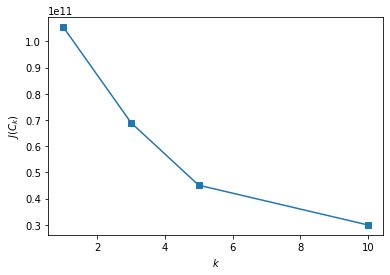

In [24]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
degree =2
deg_inertia = []
n_cluster = [1, 3, 5, 10]
for k in n_cluster:
    kmeans = KMeans(n_clusters=k, random_state=your_number_random_state).fit(X_full)
    deg_inertia.append((kmeans.inertia_)**degree)

plt.plot(n_cluster, deg_inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');
print('max(deg_inertia) = ', max(deg_inertia))

In [25]:
print('max(deg_inertia) = ', np.round(max(deg_inertia),5))

max(deg_inertia) =  105399619642.65532


10) Халявный балл! Всем спасибо, что слушали меня этот учебный год!

